<a href="https://colab.research.google.com/github/Vikashkrishna/AML_LAB/blob/main/2348571_RegressionEx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/computers.csv')

In [3]:
df.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [4]:
mean_value = df['Minutes'].mean()

Text(0, 0.5, 'Minutes')

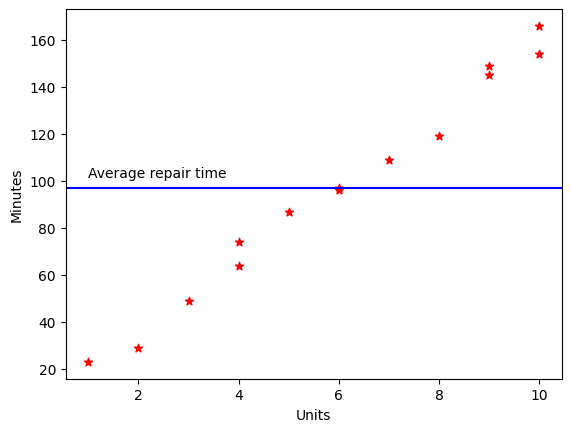

In [5]:
plt.scatter(df['Units'],df['Minutes'],color='red',marker='*')
plt.axhline(y=mean_value,color='blue')
plt.annotate('Average repair time',xy=(1,mean_value+4.5))
plt.xlabel('Units')
plt.ylabel('Minutes')

In [6]:
minutes_model1=df['Minutes'].mean()

In [7]:
minutes_model2=10+12*df['Units']

In [8]:
minutes_model3=6+18*df['Units']

In [9]:
print(minutes_model1)
print(minutes_model2)
print(minutes_model3)

97.21428571428571
0      22
1      34
2      46
3      58
4      58
5      70
6      82
7      82
8      94
9     106
10    118
11    118
12    130
13    130
Name: Units, dtype: int64
0      24
1      42
2      60
3      78
4      78
5      96
6     114
7     114
8     132
9     150
10    168
11    168
12    186
13    186
Name: Units, dtype: int64


In [10]:
df ['min_model1']= minutes_model1
df['min_model2']=minutes_model2
df['min_model3']=minutes_model3

Text(0, 0.5, 'minutes')

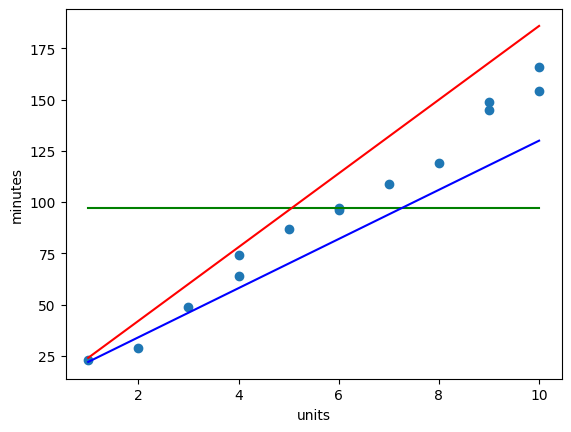

In [11]:
fig , ax=plt.subplots()
ax.scatter(x='Units',y='Minutes',data=df)
ax.plot(df['Units'],df['min_model1'],color='green')
ax.plot(df['Units'],df['min_model2'],color='blue')
ax.plot(df['Units'],df['min_model3'],color='red')
ax.set_xlabel('units')
ax.set_ylabel('minutes')

In [12]:
model1_obs=pd.DataFrame({'Units':df['Units'],'Actual Time':df['Minutes'],'Predicted time':df['min_model1'],'Error':(df.min_model1-df.Minutes)})
model1_obs

,Units,Actual Time,Predicted time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [13]:
sum(model1_obs['Error']**2)

27768.357142857145

In [14]:
model2_obs=pd.DataFrame({'Units':df['Units'],'Actual Time':df['Minutes'],'Predicted time':df['min_model2'],'Error':(df.min_model2-df.Minutes)})
model2_obs

,Units,Actual Time,Predicted time,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


In [15]:
sum(model2_obs['Error']**2)

4993

In [16]:
model3_obs=pd.DataFrame({'Units':df['Units'],'Actual Time':df['Minutes'],'Predicted time':df['min_model3'],'Error':(df.min_model3-df.Minutes)})
model3_obs

,Units,Actual Time,Predicted time,Error
0,1,23,24,1
1,2,29,42,13
2,3,49,60,11
3,4,64,78,14
4,4,74,78,4
5,5,87,96,9
6,6,96,114,18
7,6,97,114,17
8,7,109,132,23
9,8,119,150,31


In [17]:
sum(model3_obs['Error']**2)

5001

In [18]:
x=df.Units
y=df.Minutes
xy=x*y
n=len(df)
xmean=df.Units.mean()
ymean=df.Minutes.mean()
numerator=xy.sum()-n*xmean*ymean
denominator=(x**2).sum()-n*(xmean**2)
m=numerator/denominator
c=ymean-(m*xmean)
print('intercept-c:',c,'coefficient-m',m)

intercept-c: 4.161654135338296 coefficient-m 15.508771929824569


In [19]:
min_best_fit_model=c+m*df.Units
df['min_best_fit_model']=min_best_fit_model
df[['Units','Minutes','min_best_fit_model']]

,Units,Minutes,min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


Text(0.5, 1.0, 'best_fit_model_line')

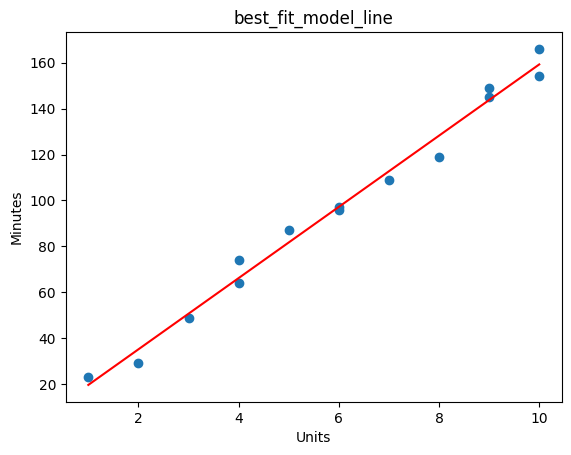

In [20]:
fig,ax=plt.subplots()
ax.scatter(x='Units',y='Minutes',data=df)
ax.plot(df.Units,df.min_best_fit_model,color='red')
ax.set_xlabel('Units')
ax.set_ylabel('Minutes')
ax.set_title('best_fit_model_line')

In [21]:
best_fit_model_obs=pd.DataFrame({'Units':df['Units'],'Actual Time':df['Minutes'],'Predicted time':df['min_best_fit_model'],'Error':(df.min_best_fit_model-df.Minutes)})
best_fit_model_obs

,Units,Actual Time,Predicted time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


In [23]:
X = df[['Units']]
y=df['Minutes']
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [33]:
print("intercepts:",model.intercept_)
print("coeffecients:",model.coef_)

intercepts: 4.161654135338296
coeffecients: [15.50877193]


In [24]:
SST = sum((df.Minutes-df.Minutes.mean()**2))
SST

-130947.64285714283

In [27]:
SSE = sum(best_fit_model_obs.Error**2)
SSE

348.848370927318

In [28]:
SSR = SST-SSE
SSR

-131296.49122807014

In [29]:
Rsq = SSR/SST
Rsq

1.0026640294037816

In [32]:
Rsql = model.score(df[['Units']],y)
Rsql

0.9874371980620736